In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy
import seaborn as sns
from scipy.stats import shapiro
from numpy.random import randn
import scipy.stats as stats
from scipy.stats import pearsonr

In [2]:
commonFontsize=8
def config_rcparams():
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['arial']
    plt.rcParams['font.size'] = commonFontsize
    plt.rcParams['axes.labelsize'] = commonFontsize
    plt.rcParams['xtick.labelsize'] = commonFontsize
    plt.rcParams['ytick.labelsize'] = commonFontsize
    plt.rcParams['axes.titlesize'] = commonFontsize
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.cal'] = 'arial'
    plt.rcParams['mathtext.rm'] = 'arial'
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.rcParams['xtick.major.size' ] = 3
    plt.rcParams['ytick.major.size' ] = 3
    plt.rcParams['text.usetex' ] = False
config_rcparams()

In [3]:
import glob, os
os.chdir("/workspace/projects/immunoproteasome/data/tcga_tumor/")
tumor_list=[]
for  i in glob.glob("*.tsv"):
    tumor_list.append(i.split('.')[0])
os.chdir("/workspace/incubator/rahul_project/")

In [4]:
input_path1="/workspace/projects/immunoproteasome/data/tcga_tumor/"
copy_no_df=pd.read_csv("/workspace/shared/dataset/tcga_exome/CNA/all_thresholded.by_genes_whitelisted.tsv",index_col='Gene Symbol',sep="\t")
copy_no_df=copy_no_df.drop(['Locus ID','Cytoband'],axis=1)
copy_no_df.columns= copy_no_df.columns.str.split('-').str[0:3].str.join('.')
copy_no_df=copy_no_df.T
copy_no_df=copy_no_df[['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10']]

p_5=[]
p_6=[]
p_7=[]
p_8=[]
p_9=[]
p_10=[]
frames={}

for i in range(len(tumor_list)): 
    gene_data_frame=pd.read_csv(input_path1+tumor_list[i]+'.tsv',index_col='Hybridization REF',sep='\t')
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    gene_data_frame=gene_data_frame.T+1
    
    df_merged=pd.merge(gene_data_frame,copy_no_df,left_index=True,right_index=True) 
    df_tmp=np.log2(df_merged[['PSMB5_x','PSMB6_x','PSMB7_x','PSMB8_x','PSMB9_x','PSMB10_x']])
    df_cop_no=df_merged[['PSMB5_y','PSMB6_y','PSMB7_y','PSMB8_y','PSMB9_y','PSMB10_y']]
    
    dt_tmp1=df_merged[['PSMB5_x','PSMB6_x','PSMB7_x','PSMB8_x','PSMB9_x','PSMB10_x','PSMB5_y','PSMB6_y','PSMB7_y','PSMB8_y','PSMB9_y','PSMB10_y']].corr()
    frames[i]= dt_tmp1 
    
    p_5.append(df_merged[['PSMB5_x','PSMB5_y']].corr(method='spearman')['PSMB5_x'][1])
    p_6.append(df_merged[['PSMB6_x','PSMB6_y']].corr(method='spearman')['PSMB6_x'][1])
    p_7.append(df_merged[['PSMB7_x','PSMB7_y']].corr(method='spearman')['PSMB7_x'][1])
    p_8.append(df_merged[['PSMB8_x','PSMB8_y']].corr(method='spearman')['PSMB8_x'][1])
    p_9.append(df_merged[['PSMB9_x','PSMB9_y']].corr(method='spearman')['PSMB9_x'][1])
    p_10.append(df_merged[['PSMB10_x','PSMB10_y']].corr(method='spearman')['PSMB10_x'][1])
    
d={'PSMB5':p_5,'PSMB6':p_6,'PSMB7':p_7,'PSMB8':p_8,'PSMB9':p_9,'PSMB10':p_10}
PSMB_corr_df=pd.DataFrame(d)
PSMB_corr_df.index=tumor_list

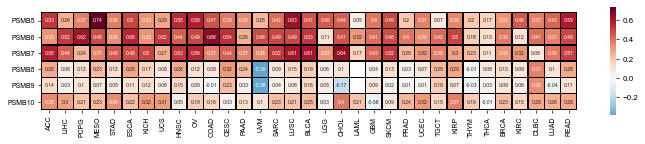

In [5]:
fig=plt.figure(figsize=(12,2))
res=sns.heatmap(PSMB_corr_df.round(2).T,annot=True,xticklabels=True, yticklabels=True,annot_kws={"size":5},linewidths=0.5, linecolor='black',square=True,cmap="RdBu_r",center=0)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 7)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 7,rotation=0)
plt.savefig('/workspace/projects/immunoproteasome/plots/'+'Copy_no_genes_correlation_v1'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()

In [6]:
input_path1="/workspace/projects/immunoproteasome/data/tcga_tumor/"
frames1={}
frames1={}
for i in range(len(tumor_list)):  
    gene_data_frame=pd.read_csv(input_path1+tumor_list[i]+'.tsv',index_col='Hybridization REF',sep='\t')
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    gene_data_frame=np.log2(gene_data_frame+1)
    gene_data_frame=gene_data_frame.T
   
    #pan_cancer_data_frame_4.index=pan_cancer_data_frame_4['sample']
    dt_tmp=pd.merge(gene_data_frame,copy_no_df,left_index=True,right_index=True)   
    gene_list_1=list(dt_tmp.columns)
    newlist=[x[:-2] for x in gene_list_1]
    dt_tmp.columns=newlist
    dt_tmp1=dt_tmp[['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10']]#,'HLA-A','HLA-B','HLA-C','B2M','TAP1','TAP2','ERAP1','ERAP2','CANX','CALR','PDIA3','TAPBP']]
    frames1[i]=dt_tmp1
dff4=pd.concat(frames1)

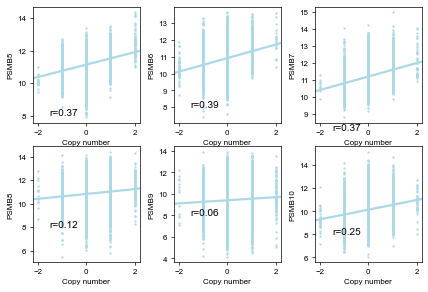

In [7]:
col_name=['PSMB5','Copy number','PSMB6','Copy number','PSMB7','Copy number','PSMB8','Copy number','PSMB9','Copy number','PSMB10','Copy number']
dff4.columns=col_name

fig, axs = plt.subplots(2,3)
fig.tight_layout()
sns.regplot(x=dff4.iloc[:,1], y=dff4.iloc[:,0],scatter_kws={'s':2}, ax=axs[0,0],color = 'lightblue')
x=dff4.iloc[:,0]
y=dff4.iloc[:,1]
coeff, _ = scipy.stats.spearmanr(x, y)
axs[0,0].text(-1.5,8,'r'+'='+str(round(coeff,2)),fontsize=10)

sns.regplot(x=dff4.iloc[:,3], y=dff4.iloc[:,2],scatter_kws={'s':2}, ax=axs[0,1],color = 'lightblue')
x=dff4.iloc[:,3]
y=dff4.iloc[:,2]
coeff, _ = scipy.stats.spearmanr(x, y)
axs[0,1].text(-1.5,8,'r'+'='+str(round(coeff,2)),fontsize=10)

sns.regplot(x=dff4.iloc[:,5], y=dff4.iloc[:,4],scatter_kws={'s':2}, ax=axs[0,2],color = 'lightblue')
x=dff4.iloc[:,5]
y=dff4.iloc[:,4]
coeff, _ = scipy.stats.spearmanr(x, y)
axs[0,2].text(-1.5,8,'r'+'='+str(round(coeff,2)),fontsize=10)

sns.regplot(x=dff4.iloc[:,7], y=dff4.iloc[:,6], scatter_kws={'s':2},ax=axs[1,0],color = 'lightblue')
x=dff4.iloc[:,7]
y=dff4.iloc[:,6]
coeff, _ = scipy.stats.spearmanr(x, y)
axs[1,0].text(-1.5,8,'r'+'='+str(round(coeff,2)),fontsize=10)

sns.regplot(x=dff4.iloc[:,9], y=dff4.iloc[:,8], scatter_kws={'s':2},ax=axs[1,1],color = 'lightblue')
x=dff4.iloc[:,9]
y=dff4.iloc[:,8]
coeff, _ = scipy.stats.spearmanr(x, y)
axs[1,1].text(-1.5,8,'r'+'='+str(round(coeff,2)),fontsize=10)

sns.regplot(x=dff4.iloc[:,11], y=dff4.iloc[:,10], scatter_kws={'s':2},ax=axs[1,2],color = 'lightblue')
x=dff4.iloc[:,11]
y=dff4.iloc[:,10]
coeff, _ = scipy.stats.spearmanr(x, y)
axs[1,2].text(-1.5,8,'r'+'='+str(round(coeff,2)),fontsize=10)

plt.savefig('/workspace/projects/immunoproteasome/plots/'+'Copy_no_alteration_gene_expression_pan_cancer'+'.svg',bbox_inches = "tight",dpi=500)
plt.show()


### Mutation analysis supplementary file

In [8]:
mutation_list=['missense_variant',
 'upstream_gene_variant',
 '3_prime_UTR_variant',
 'inframe_deletion',
 'stop_gained',
 'splice_acceptor_variant',
 'intron_variant',
 '5_prime_UTR_variant',
 'inframe_insertion',
 'frameshift_variant',
 'splice_donor_variant',
 'stop_lost',
 'downstream_gene_variant',
 'splice_region_variant',
 'mature_miRNA_variant',
 'start_lost',
 'stop_retained_variant',
 'protein_altering_variant',
 'coding_sequence_variant',
 'transcript_ablation',
 'incomplete_terminal_codon_variant']

In [9]:
pan_cancer_data_frame_1=pd.read_csv("/workspace/shared/dataset/tcga_exome/mutations/data_parsed/PANCANCER.tsv.gz",sep="\t")
mutation_list=['missense_variant','stop_gained','frameshift_variant','inframe_deletion','inframe_insertion'] 
pan_cancer_data_frame_2=pan_cancer_data_frame_1
pan_cancer_data_frame_3=pan_cancer_data_frame_2.loc[pan_cancer_data_frame_2['Consequence'].isin(mutation_list)]
pan_cancer_data_frame_4=pan_cancer_data_frame_3[['Tumor_Sample_Barcode','tumor_tissue','Hugo_Symbol','Consequence','Protein_position','Amino_acids','Start_Position','End_Position','Chromosome']]
pan_cancer_data_frame_4['sample'] = pan_cancer_data_frame_4.apply(lambda row: ".".join(row['Tumor_Sample_Barcode'].split("-")[0:3]), axis=1)   

/home/rahul/miniconda3/envs/testenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
APM_gene_list=['PSMB5','PSMB6','PSMB7','PSMB8','PSMB9','PSMB10']
input_path1="/workspace/projects/immunoproteasome/data/tcga_tumor/"
mutation_list1=['missense_variant','stop_gained','frameshift_variant','inframe_deletion','inframe_insertion']
#################################################################################################
tumor_mutation_df = pd.read_csv('/workspace/projects/immunoproteasome/data/tcga_cohort.txt', sep="\t",header = 0)
tumor_mutation_df['TMB']=tumor_mutation_df['total']/50
tumor_mutation_df=tumor_mutation_df[tumor_mutation_df['TMB']<10]
tumor_mutation_df['Tumor_Sample_Barcode']=tumor_mutation_df['Tumor_Sample_Barcode'].str.split('-').str[0:3].str.join('.')
tumor_mutation_df=tumor_mutation_df.set_index('Tumor_Sample_Barcode')
non_hypermutated_sample_id=list(tumor_mutation_df.index)

pan_cancer_data_frame_4_1=pan_cancer_data_frame_4[pan_cancer_data_frame_4['sample'].isin(non_hypermutated_sample_id)]
pan_cancer_data_frame_4_2=pan_cancer_data_frame_4_1.loc[pan_cancer_data_frame_4_1['Consequence'].isin(mutation_list1)]
pan_cancer_data_frame_4_v1=pan_cancer_data_frame_4_2.set_index('sample')
#################################################################################################
frac_list=[]
frac_list1=[]
tumor_tissue_list=list(pan_cancer_data_frame_4['tumor_tissue'].unique())
c=[]
for i in range(len(tumor_tissue_list)): 
    gene_data_frame=pd.read_csv(input_path1+tumor_tissue_list[i]+'.tsv',sep='\t')
    gene_data_frame=gene_data_frame.set_index('Hybridization REF')
    gene_data_frame.columns=gene_data_frame.columns.str.split('-').str[0:3].str.join('.')
    mutation_gene_exp_df=pd.merge(pan_cancer_data_frame_4_v1, gene_data_frame.T[APM_gene_list], left_index=True, right_index=True)
    
    a=[]
    aa=[]
    for i in range(6):
        b=len(mutation_gene_exp_df.index.unique())
        a.append((mutation_gene_exp_df[mutation_gene_exp_df['Hugo_Symbol']==APM_gene_list[i]].shape[0]/b))
        aa.append((mutation_gene_exp_df[mutation_gene_exp_df['Hugo_Symbol']==APM_gene_list[i]].shape[0]))
    c.append(b)
    frac_list.append(a)
    frac_list1.append(aa)
mut_fraction_apm_genes=pd.DataFrame(frac_list,columns=APM_gene_list,index=tumor_tissue_list)   
mut_fraction_apm_genes1=pd.DataFrame(frac_list1,columns=APM_gene_list,index=tumor_tissue_list)  
mut_fraction_apm_genes.loc['all_samples']=mut_fraction_apm_genes1.sum()/sum(c)

In [ ]:
with pd.ExcelWriter('/workspace/projects/immunoproteasome/supplementary_tables/Table_S5.xlsx') as writer:  
    mut_fraction_apm_genes.to_excel(writer, sheet_name='Sheet_name_1')